# LGBM & XGBM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
test_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\logistic\Titanic_test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
#Check for missing values
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


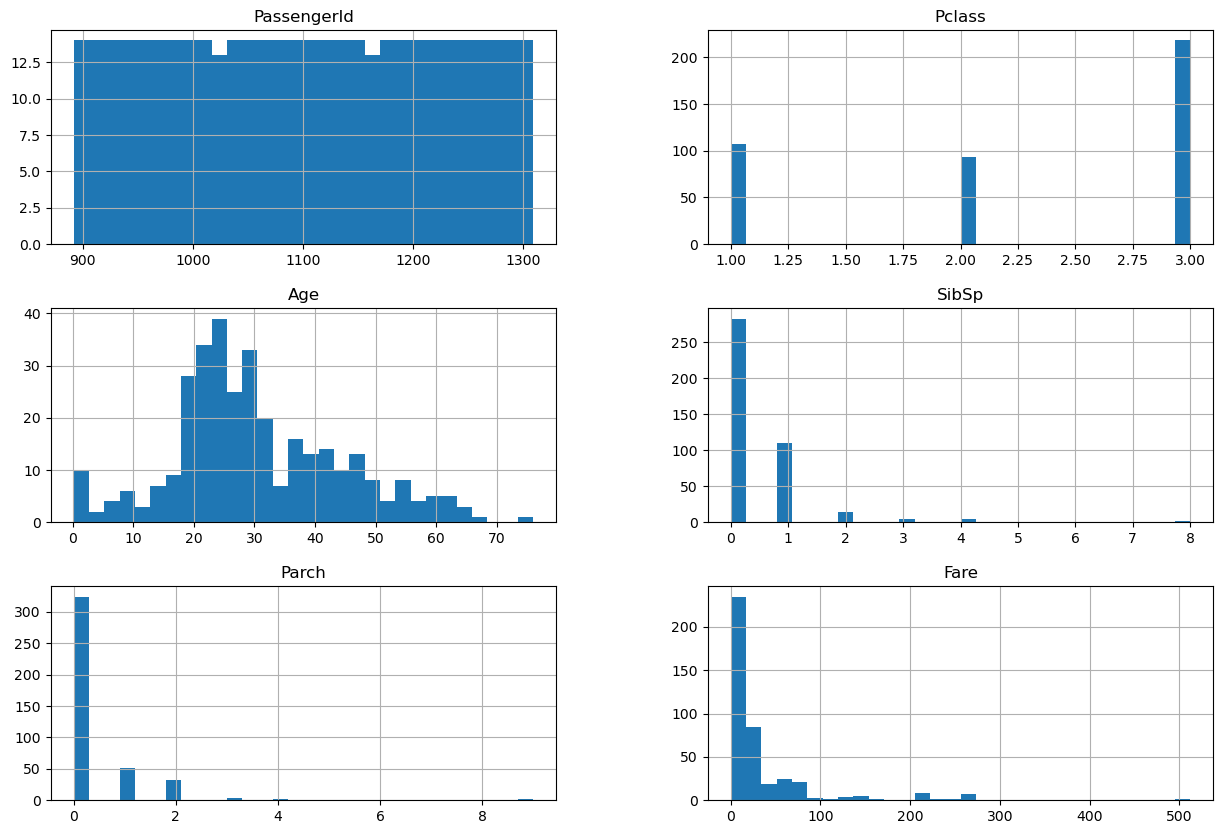

In [9]:
# Explore data distributions
test_data.hist(bins=30, figsize=(15, 10))
plt.show()

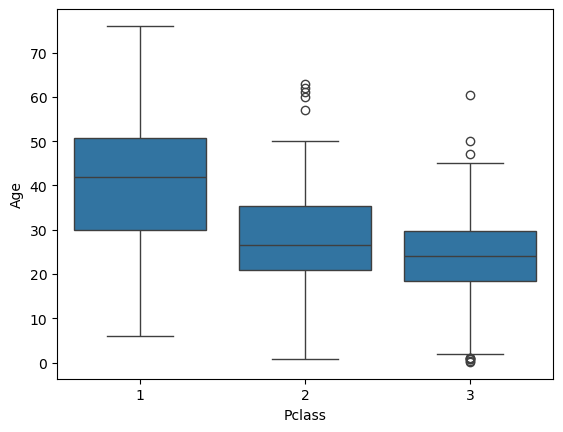

In [11]:
sns.boxplot(data=test_data, x='Pclass', y='Age')
plt.show()

In [15]:
# Impute missing Age values with median
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Impute missing Embarked values with mode
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12304\3197904497.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12304\3197904497.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [17]:
# One-hot encoding for 'Embarked' and 'Sex'
test_data = pd.get_dummies(test_data, columns=['Embarked', 'Sex'], drop_first=True)

# Drop columns not needed for modeling
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [76]:
# Define evaluation metrics
evaluation_metrics = ['accuracy', 'precision', 'recall', 'f1']


In [86]:
# Select a column for classification (e.g., 'Pclass')
y = test_data['Pclass']

# Map class labels
y = y.map({1: 0, 2: 1, 3: 2})

# Verify unique values
print(y.unique)

# Split data
X = test_data.drop(['Pclass'], axis=1)
 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<bound method Series.unique of 0      2
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    2
Name: Pclass, Length: 418, dtype: int64>


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import lightgbm as lgb


# Select target variable (e.g., 'Pclass')
y = test_data['Pclass']

# Use LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X = test_data.drop(['Pclass'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train model
lgb_model.fit(X_train, y_train)

# Predict values
y_pred = lgb_model.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 8
[LightGBM] [Info] Start training from score -1.356794
[LightGBM] [Info] Start training from score -1.534475
[LightGBM] [Info] Start training from score -0.640657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [101]:
# Select target variable (e.g., 'Pclass')
y = test_data['Pclass']

# Use LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X = test_data.drop(['Pclass'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train model
xgb_model.fit(X_train, y_train)

# Predict values
y_pred = xgb_model.predict(X_test)

# Calculate metrics
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


F1-score: 0.8784466355301851
Precision: 0.8760458839406207
Recall: 0.8888888888888888
Accuracy: 0.8809523809523809
